In [118]:
import pandas as pd
import numpy as np
import json
import re
from plotnine import *
import plotnine


%matplotlib inline
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=7)
mpl.rc('xtick', labelsize=6)
mpl.rc('ytick', labelsize=6)



# 그래프에서 한글표현을 위해 폰트를 설치합니다.
%config InlineBackend.figure_format = 'retina'


matplotlib.rc('font', family='NanumBarunGothic')  # MacOS
plt.rcParams['axes.unicode_minus'] = False


# pandas max row 
pd.options.display.max_rows = 3000

## 세종시 dataset


In [54]:
# Data Laad
df = pd.read_csv('data/아파트매매_부동산지수.csv', parse_dates=['yyyymmdd']).drop(columns=['Unnamed: 0'])

# Set 면적평균가
df['면적평균가'] = df['거래금액'].astype(float) / df['전용면적']


# Rename Column
df = df.rename(columns={'yyyymmdd':'년월일'})
df = df.set_index('년월일')

# Sort by Datetime
df = df.sort_index()
# Reducing Columns
df['법정동'] = df['법정동'].str.split(' ').str[0]
df['누적평균값'] = df['거래금액'].cumsum() / df['전용면적'].cumsum()

df = df.reindex(columns=['법정동','거래금액','전용면적','누적평균값', '아파트세종', '아파트전국','전체세종','전체서울','아파트서울','전체전국'])

In [55]:
df.columns

Index(['법정동', '거래금액', '전용면적', '누적평균값', '아파트세종', '아파트전국', '전체세종', '전체서울',
       '아파트서울', '전체전국'],
      dtype='object')

In [56]:
df.head(15)

,법정동,거래금액,전용면적,누적평균값,아파트세종,아파트전국,전체세종,전체서울,아파트서울,전체전국
년월일,,,,,,,,,,
2017-01-01,종촌동,27300,59.8652,456.024535,95.9,99.0,96.0,97.1,96.3,98.7
2017-01-01,보람동,8600,16.9849,467.143179,95.9,99.0,96.0,97.1,96.3,98.7
2017-01-02,조치원읍,13000,84.9228,302.275597,95.9,99.0,96.0,97.1,96.3,98.7
2017-01-02,아름동,31300,84.9280,325.090018,95.9,99.0,96.0,97.1,96.3,98.7
2017-01-02,어진동,7600,17.4250,332.417230,95.9,99.0,96.0,97.1,96.3,98.7
2017-01-02,고운동,32000,84.9894,343.153107,95.9,99.0,96.0,97.1,96.3,98.7
2017-01-02,조치원읍,19850,84.6682,321.934790,95.9,99.0,96.0,97.1,96.3,98.7
2017-01-02,조치원읍,22500,128.9491,288.147514,95.9,99.0,96.0,97.1,96.3,98.7
2017-01-02,조치원읍,19000,84.7067,279.794569,95.9,99.0,96.0,97.1,96.3,98.7


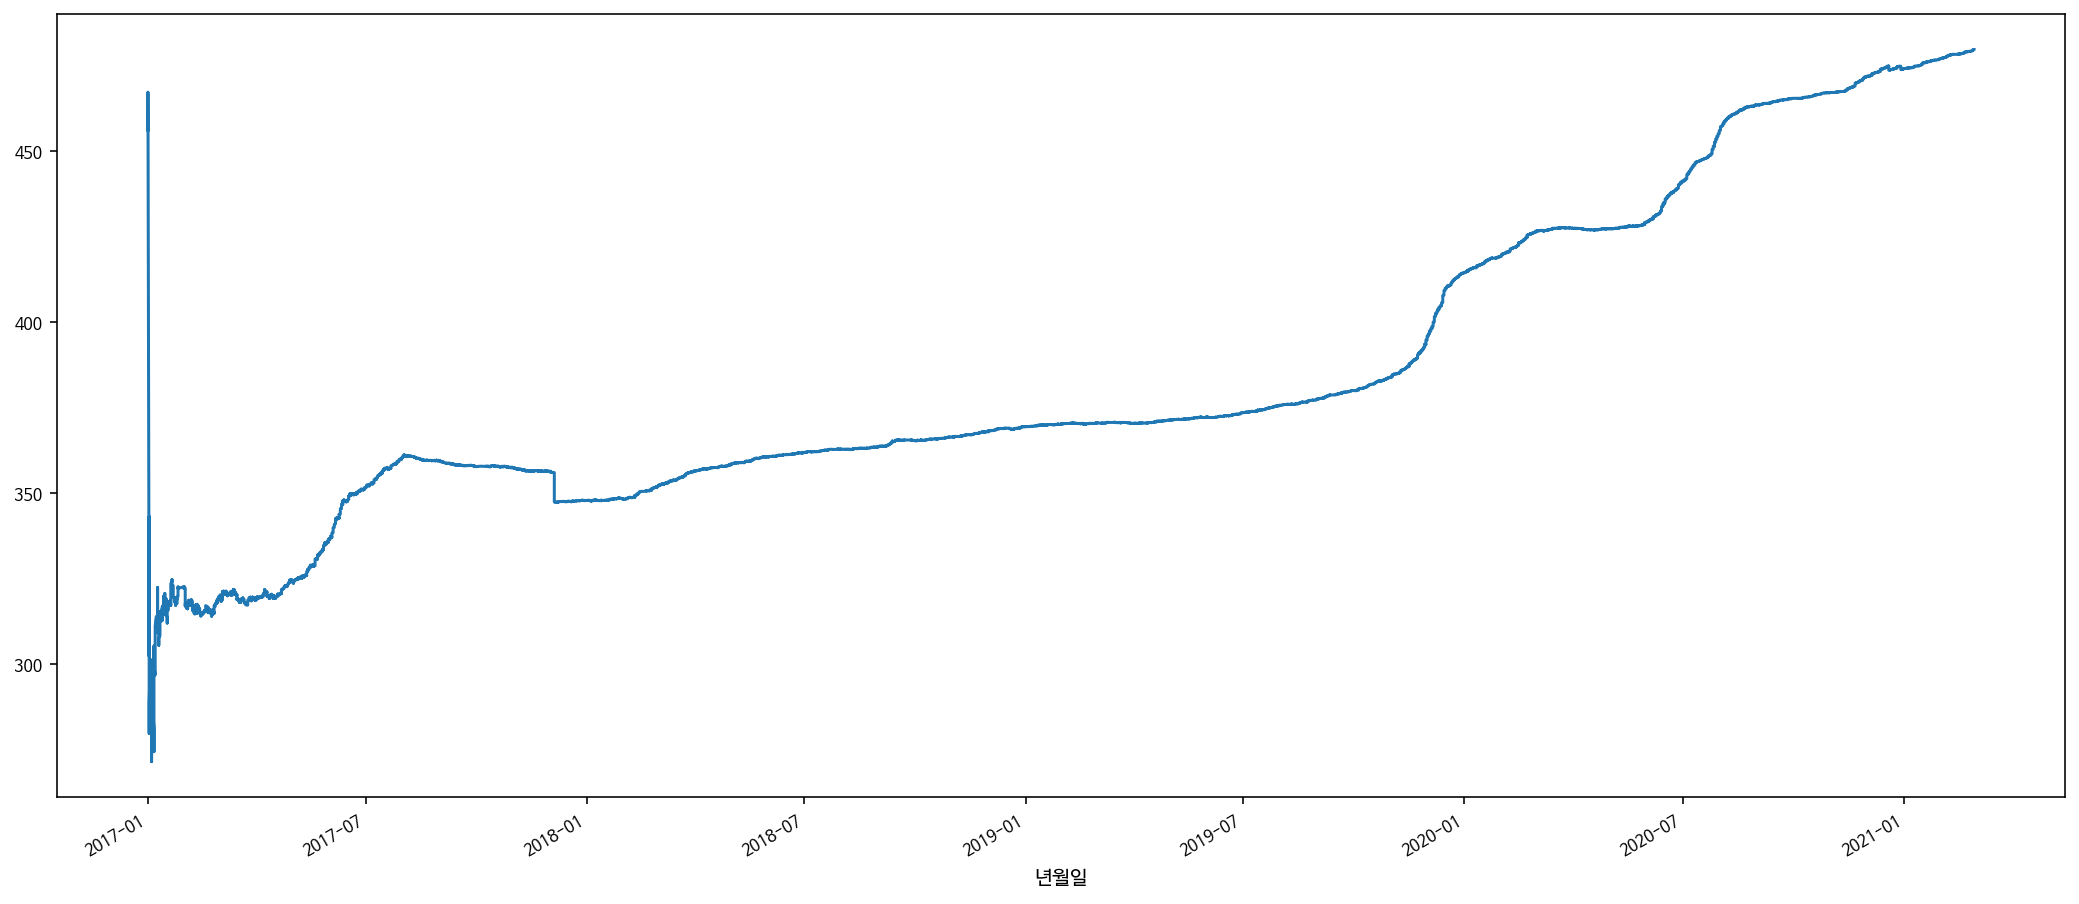

In [57]:
# y = 누적 평균값

df['누적평균값'].plot(figsize=(18,8));
# dong.head()

In [58]:
df.describe().transpose().applymap(np.ceil)

,count,mean,std,min,25%,50%,75%,max
거래금액,24417.0,36995.0,21575.0,1800.0,23000.0,34000.0,48500.0,170000.0
전용면적,24417.0,78.0,24.0,13.0,60.0,85.0,85.0,210.0
누적평균값,24417.0,400.0,46.0,272.0,361.0,398.0,435.0,480.0
아파트세종,24417.0,109.0,16.0,96.0,99.0,101.0,114.0,146.0
아파트전국,24417.0,101.0,3.0,98.0,100.0,101.0,102.0,109.0
전체세종,24417.0,109.0,14.0,96.0,101.0,102.0,114.0,142.0
전체서울,24417.0,107.0,5.0,98.0,104.0,109.0,109.0,113.0
아파트서울,24417.0,108.0,6.0,97.0,105.0,111.0,111.0,115.0
전체전국,24417.0,102.0,3.0,99.0,101.0,101.0,103.0,109.0


In [59]:
df.dtypes

법정동       object
거래금액       int64
전용면적     float64
누적평균값    float64
아파트세종    float64
아파트전국    float64
전체세종     float64
전체서울     float64
아파트서울    float64
전체전국     float64
dtype: object

In [60]:
df.head()

,법정동,거래금액,전용면적,누적평균값,아파트세종,아파트전국,전체세종,전체서울,아파트서울,전체전국
년월일,,,,,,,,,,
2017-01-01,종촌동,27300,59.8652,456.024535,95.9,99.0,96.0,97.1,96.3,98.7
2017-01-01,보람동,8600,16.9849,467.143179,95.9,99.0,96.0,97.1,96.3,98.7
2017-01-02,조치원읍,13000,84.9228,302.275597,95.9,99.0,96.0,97.1,96.3,98.7
2017-01-02,아름동,31300,84.9280,325.090018,95.9,99.0,96.0,97.1,96.3,98.7
2017-01-02,어진동,7600,17.4250,332.417230,95.9,99.0,96.0,97.1,96.3,98.7


## 이동 평균선
### 동별로 데이터 분리

In [61]:
# reset index
df = df.reset_index()

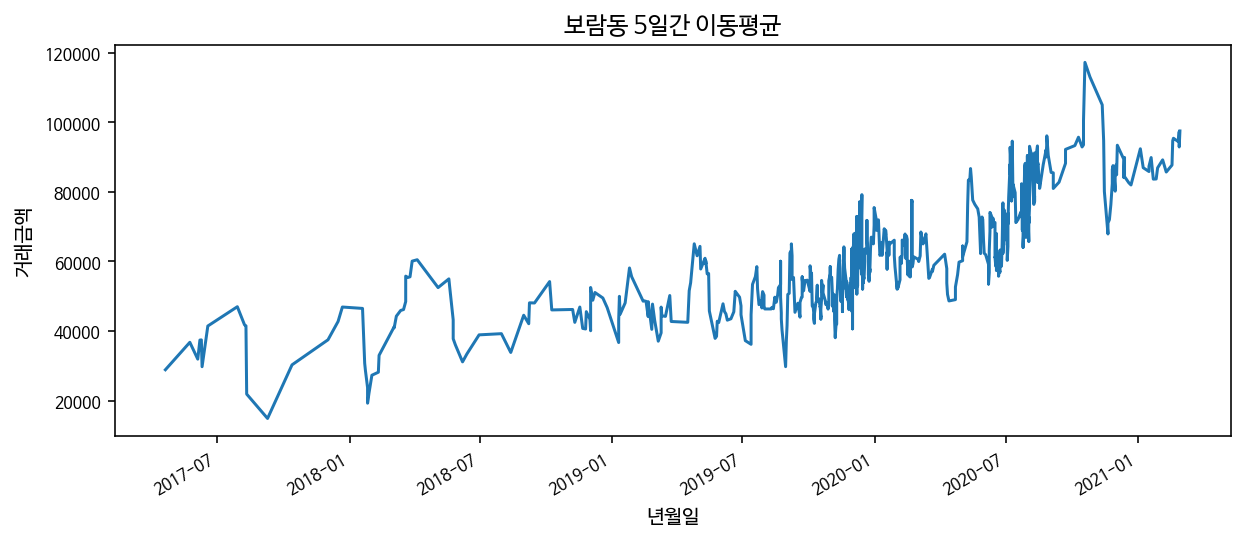

In [49]:
datemin = np.datetime64(df_보람동.index[0], 'M')
datemax = np.datetime64(df_보람동.index[-1], 'M')

df_보람동['거래금액'].rolling(5).mean().plot(ylabel='거래금액', title='보람동 5일간 이동평균', figsize=(10,4));

In [109]:
# 이동편균 기간 5로 설정
def setMovingMean(df, dong, duration=5):
    dong_df = df[df['법정동']==dong].copy()
    dong_df['이동평균'] = dong_df['거래금액'].rolling(duration).mean()
    return dong_df

mov_df = pd.concat(setMovingMean(df, dong, 8) for dong in df['법정동'].unique())
mov_df




,년월일,법정동,거래금액,전용면적,누적평균값,아파트세종,아파트전국,전체세종,전체서울,아파트서울,전체전국,이동평균
0,2017-01-01,종촌동,27300,59.8652,456.024535,95.9,99.0,96.0,97.1,96.3,98.7,NaN
12,2017-01-03,종촌동,28900,59.9383,301.465190,95.9,99.0,96.0,97.1,96.3,98.7,NaN
20,2017-01-05,종촌동,27300,59.9383,285.973479,95.9,99.0,96.0,97.1,96.3,98.7,NaN
38,2017-01-07,종촌동,36500,84.9940,306.528230,95.9,99.0,96.0,97.1,96.3,98.7,NaN
41,2017-01-07,종촌동,37000,84.9941,309.721452,95.9,99.0,96.0,97.1,96.3,98.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
24040,2021-01-30,해밀동,111000,102.6800,476.746329,144.6,107.4,140.0,111.5,113.9,107.1,67385.0
24163,2021-02-06,해밀동,67600,59.4000,477.711453,146.0,108.9,141.2,112.1,114.7,108.1,65085.0
24201,2021-02-10,해밀동,67000,84.9500,478.104831,146.0,108.9,141.2,112.1,114.7,108.1,61835.0
24204,2021-02-10,해밀동,92700,84.5300,478.144142,146.0,108.9,141.2,112.1,114.7,108.1,69547.5


In [113]:
df['법정동'].unique()

array(['종촌동', '보람동', '조치원읍', '아름동', '어진동', '고운동', '한솔동', '연서면', '도담동',
       '연동면', '장군면', '나성동', '부강면', '소담동', '금남면', '전의면', '전동면', '소정면',
       '새롬동', '대평동', '다정동', '반곡동', '해밀동'], dtype=object)

In [136]:
mov_df[mov_df['법정동']=='해밀동'].count()[0]

24

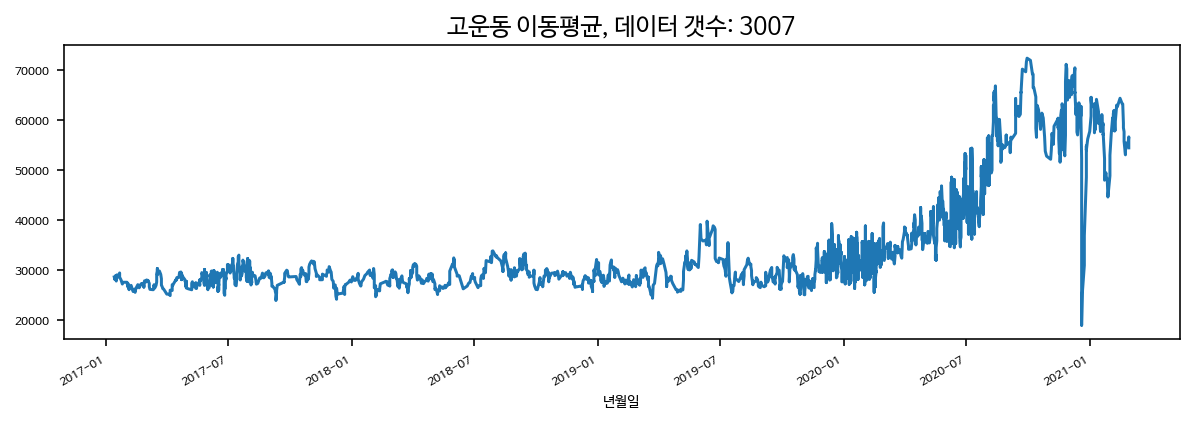

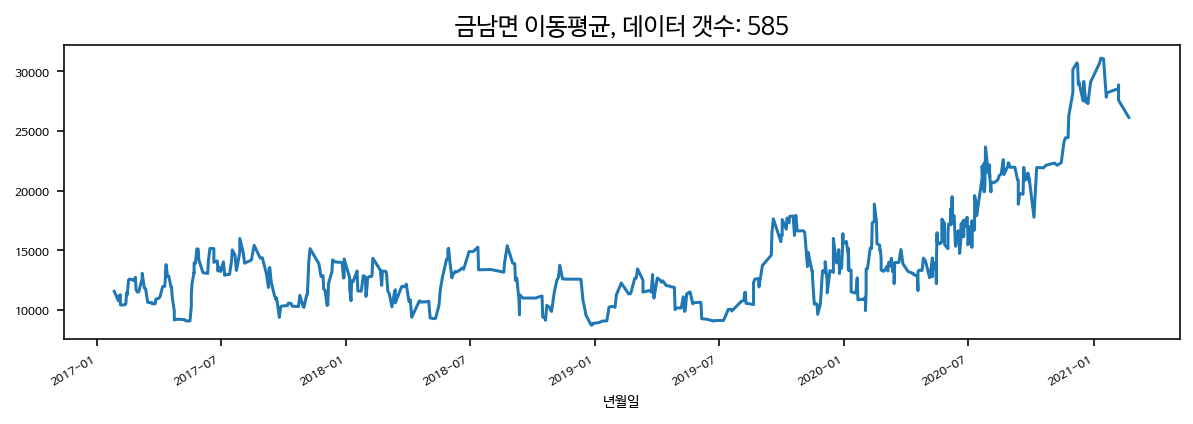

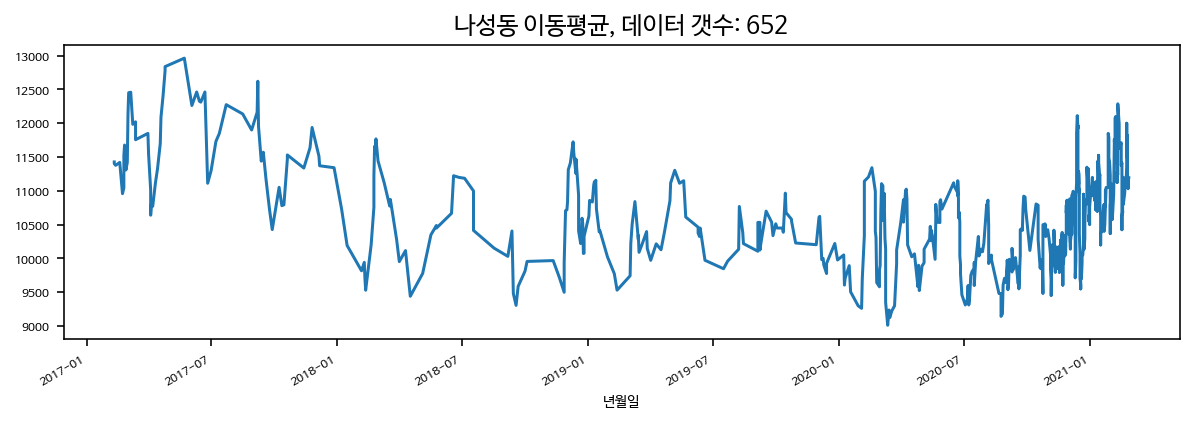

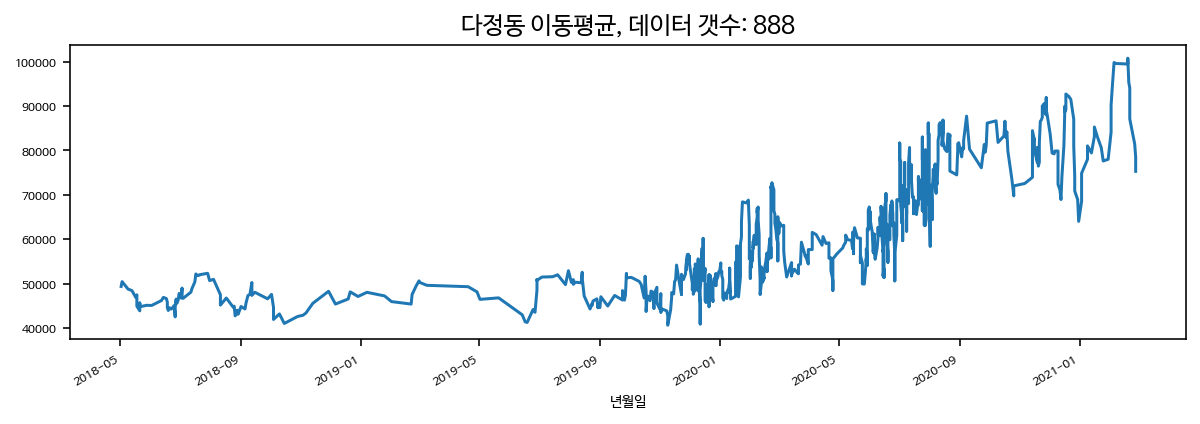

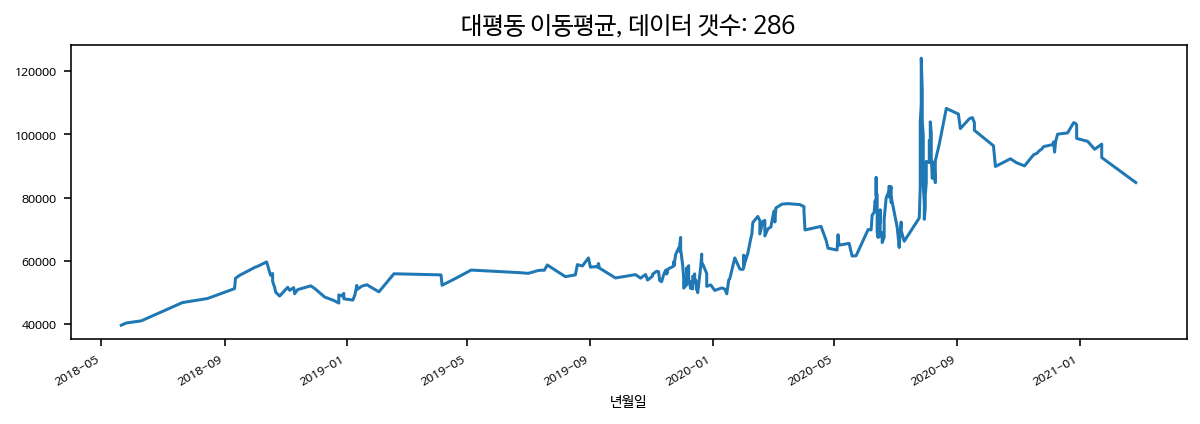

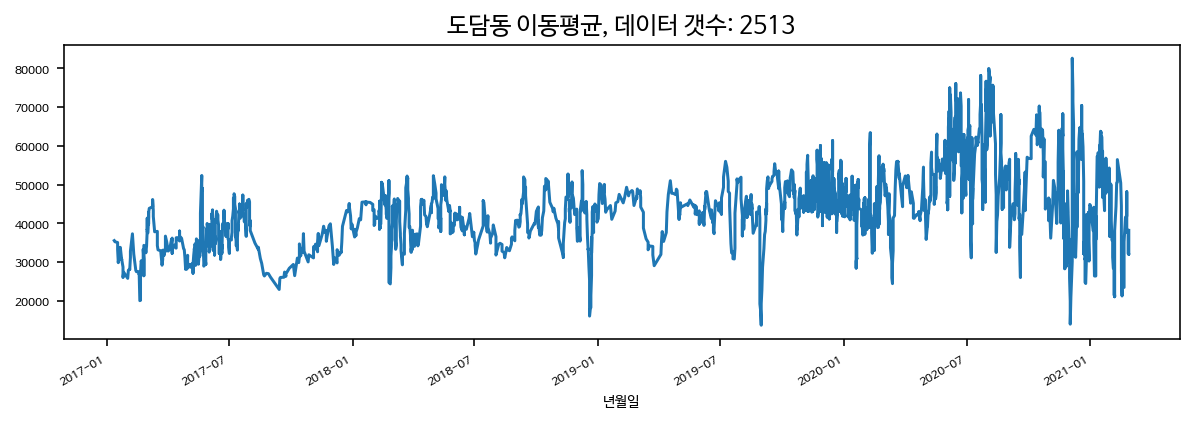

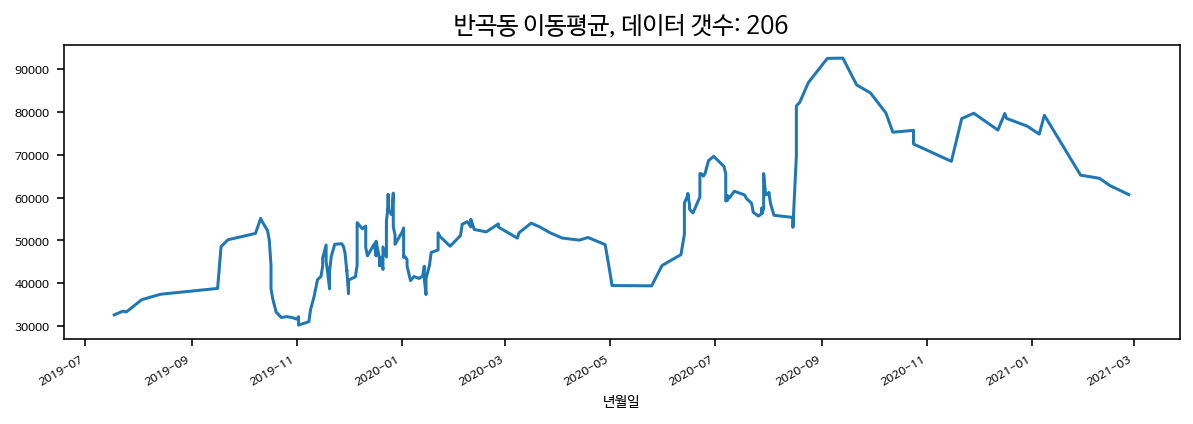

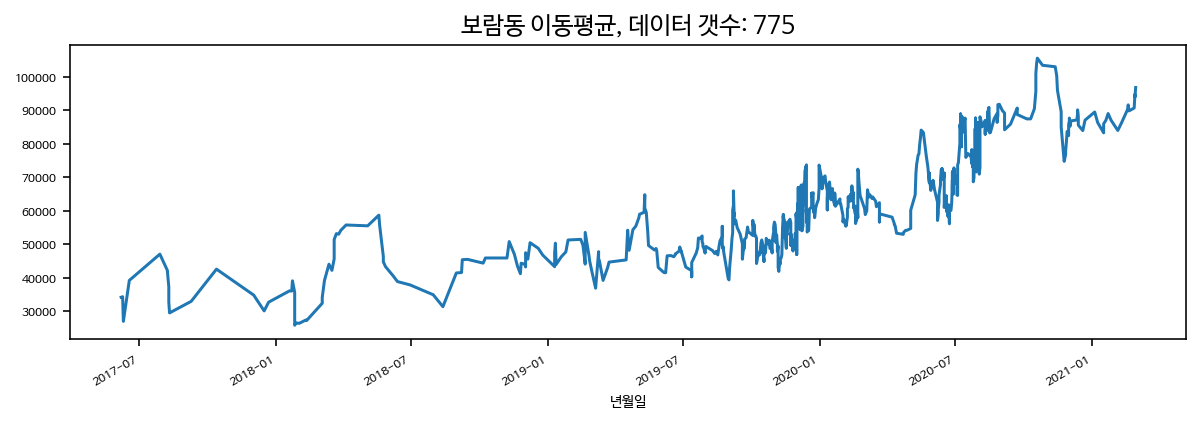

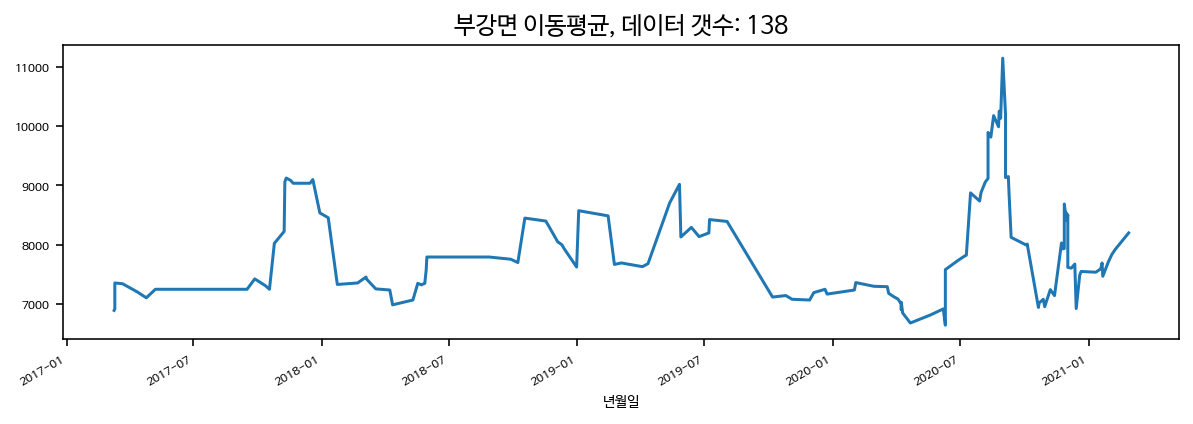

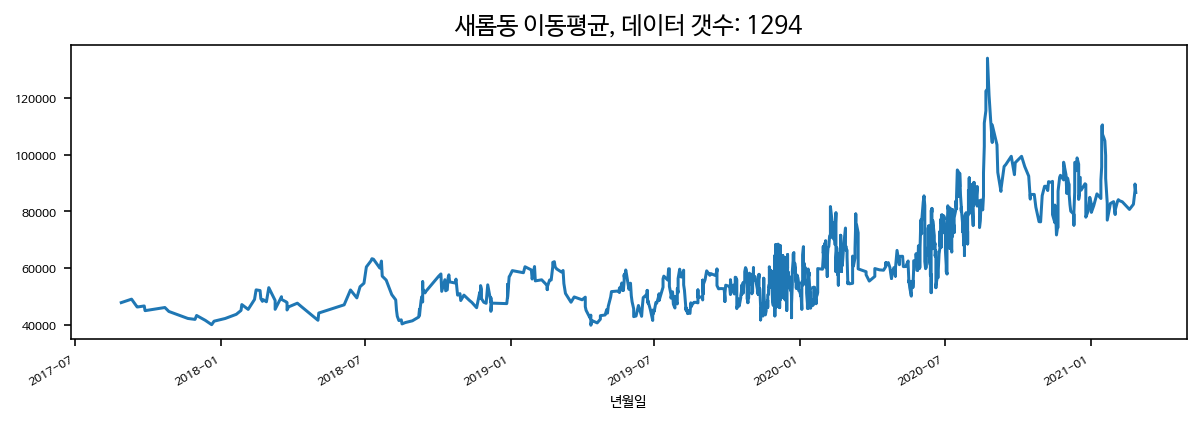

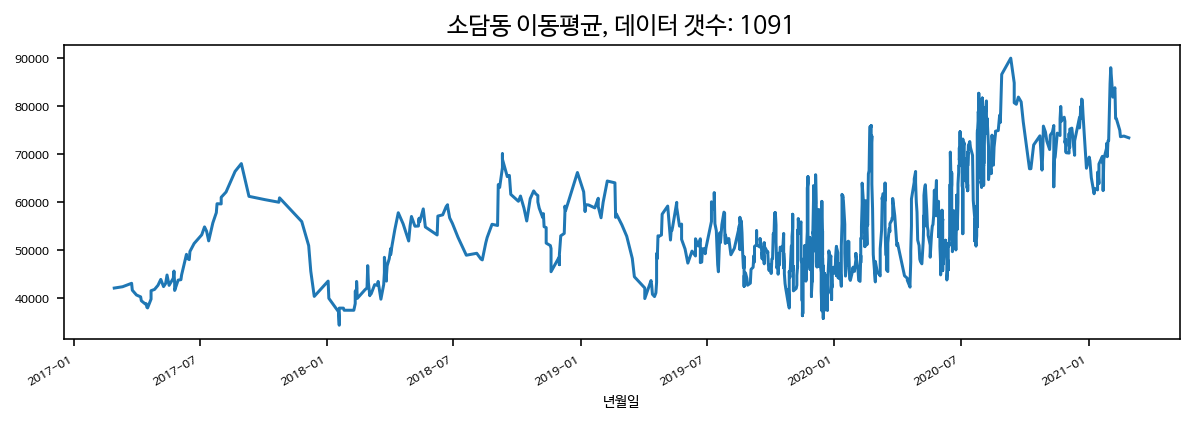

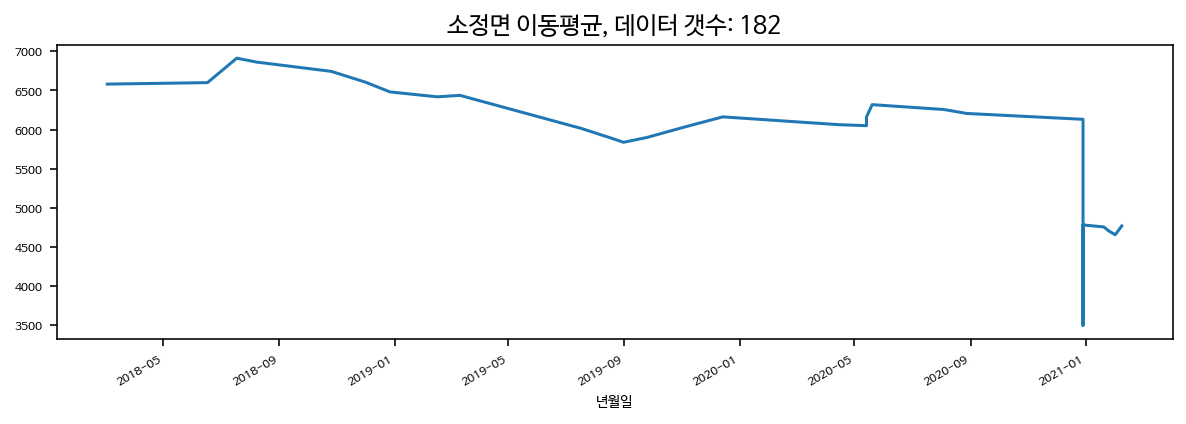

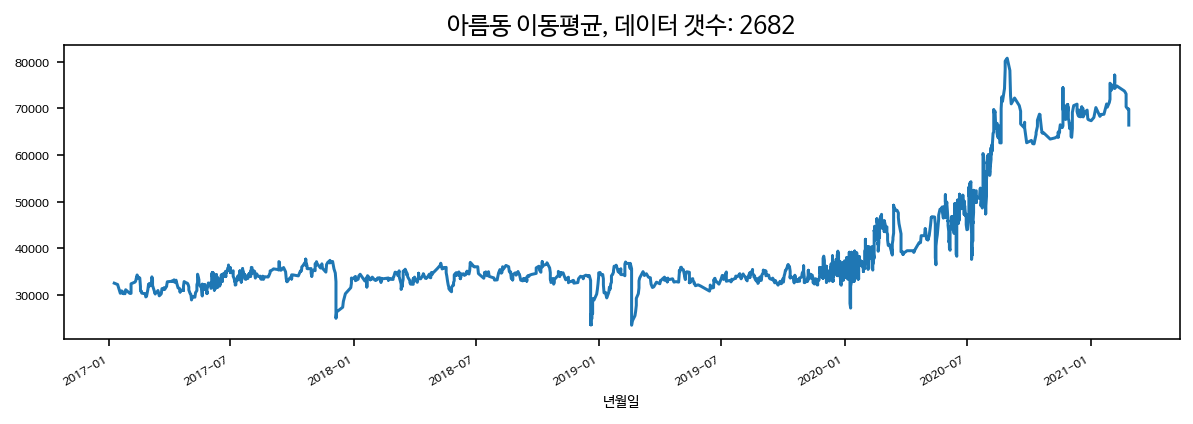

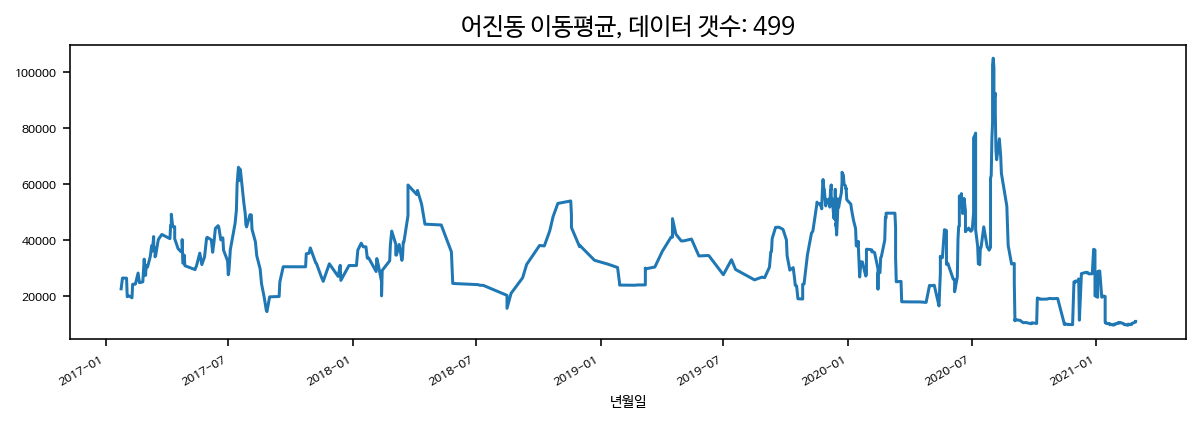

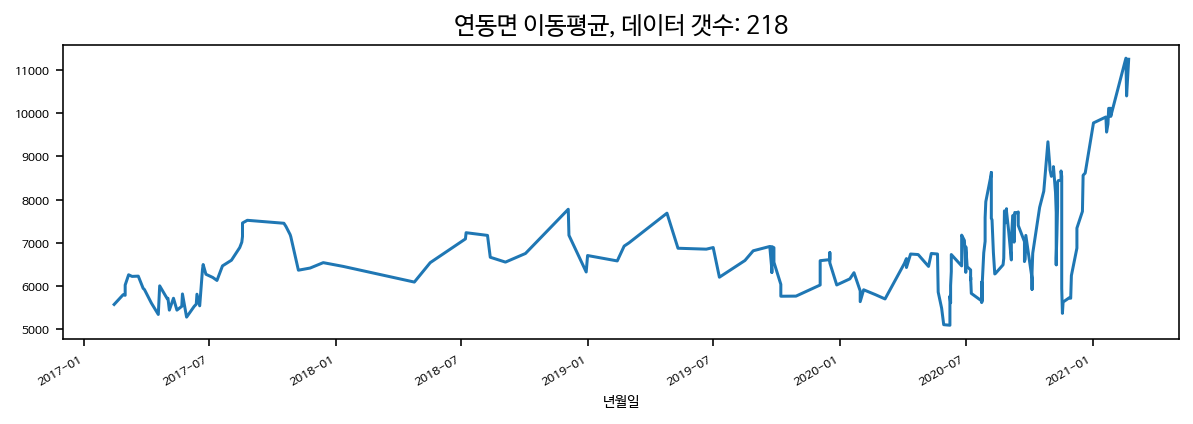

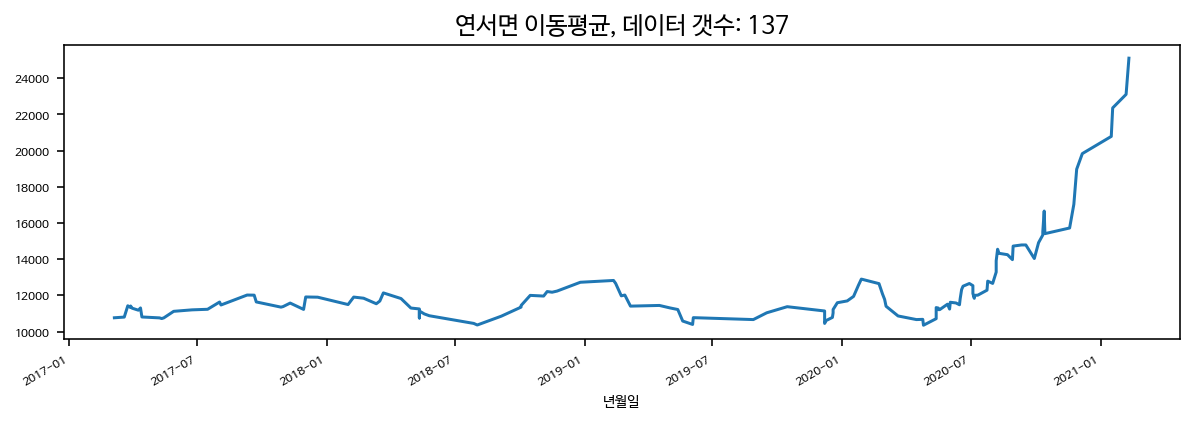

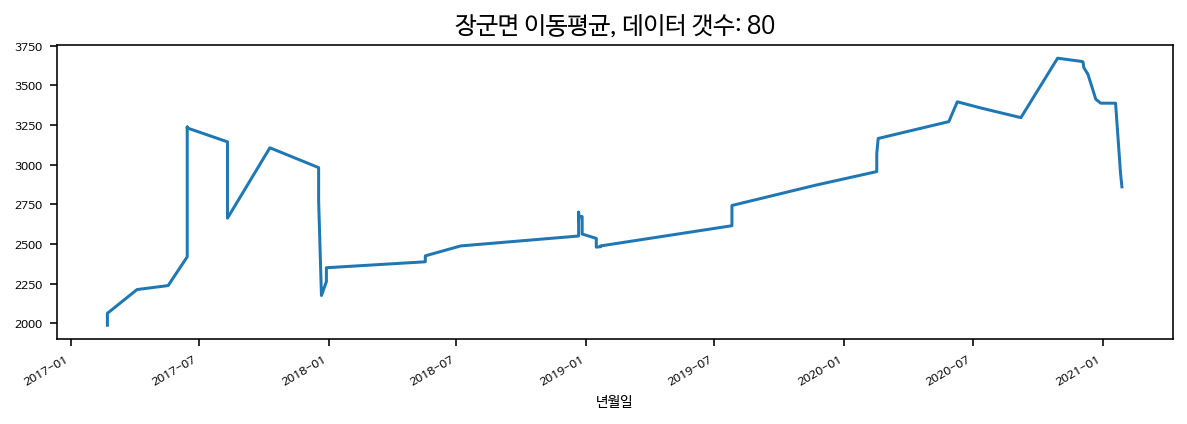

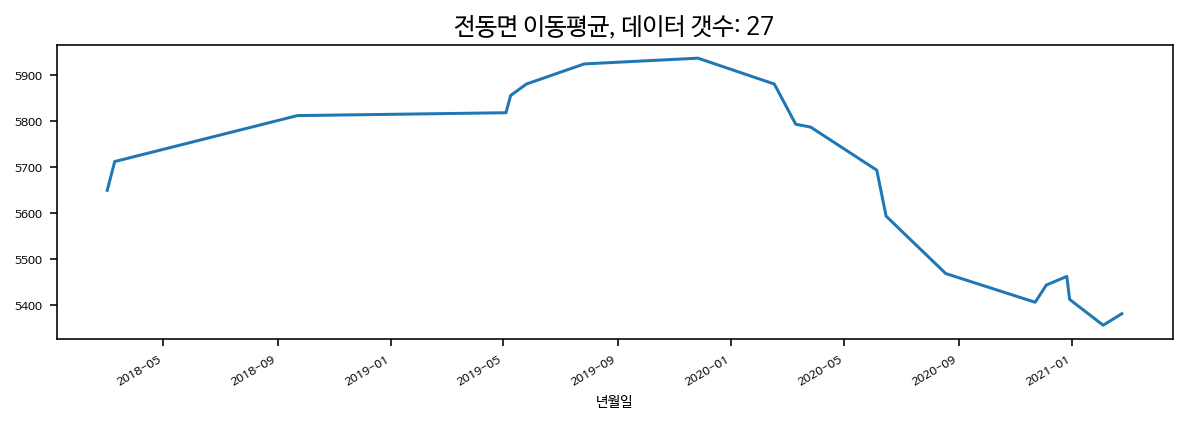

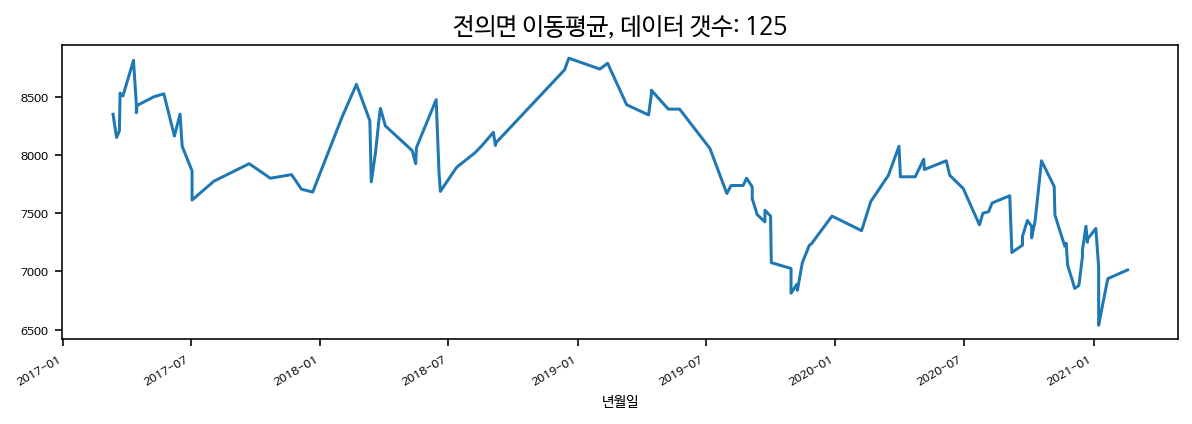

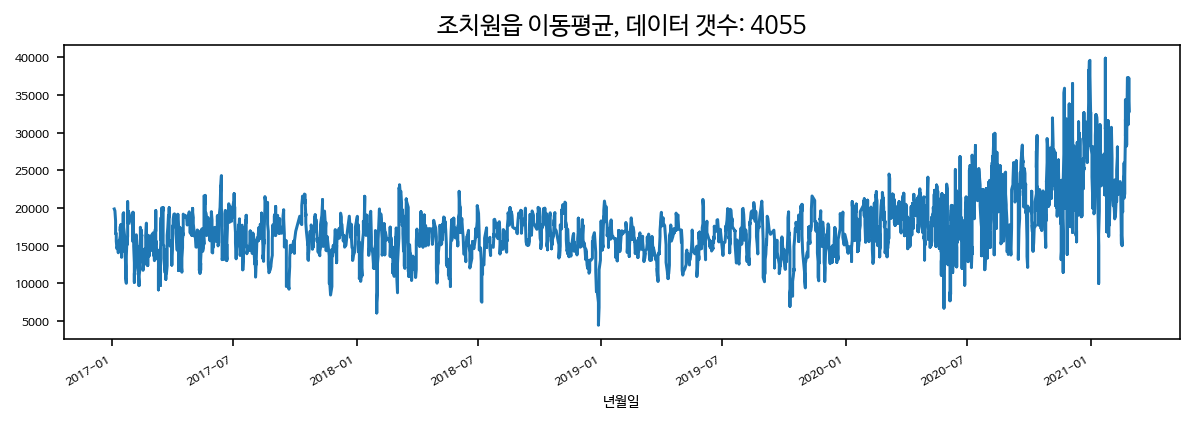

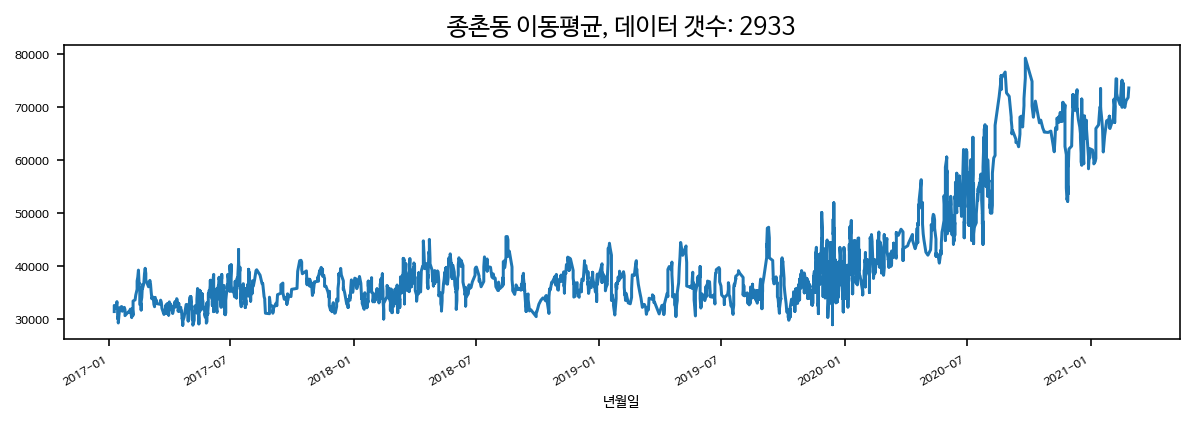

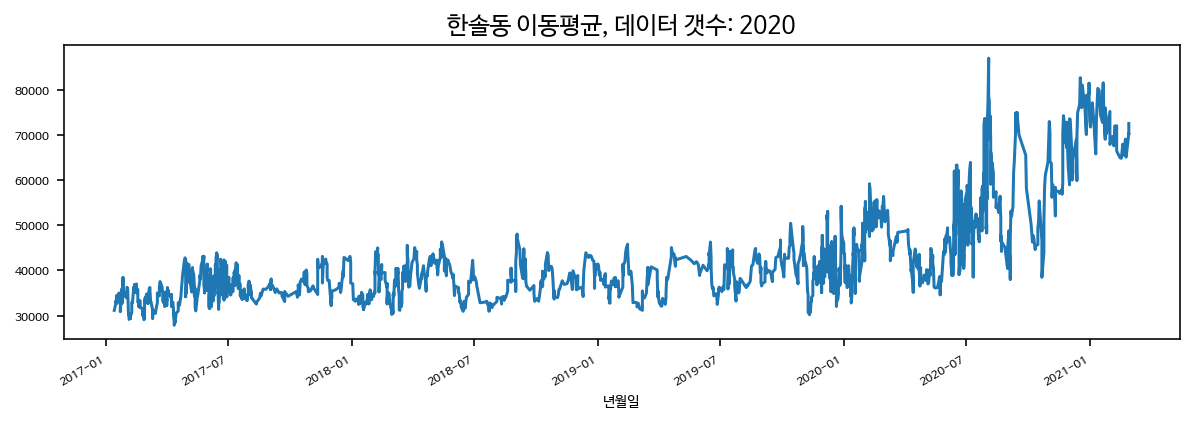

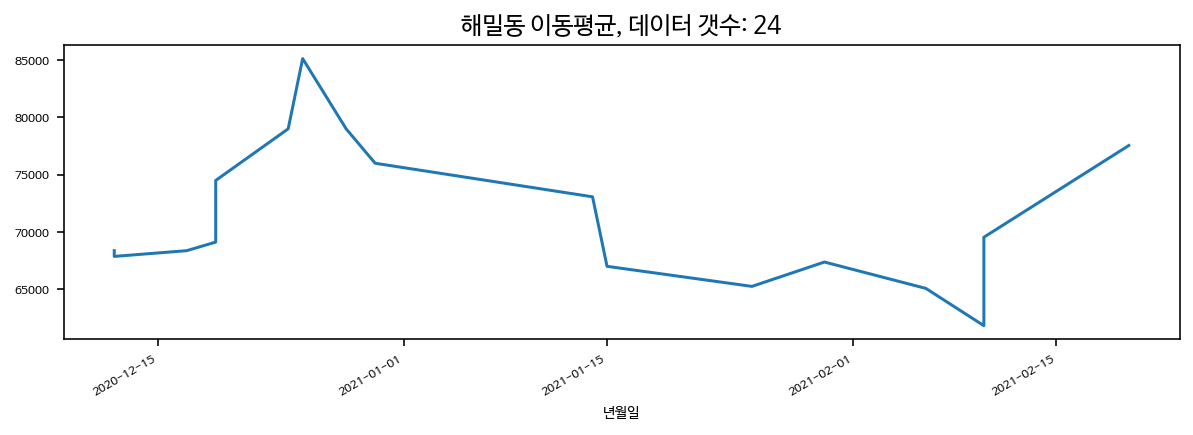

In [139]:
for dong in np.sort(df['법정동'].unique()):
    mov_df[mov_df['법정동']==dong].set_index('년월일')['이동평균'].plot(figsize=(10,3), title=dong + ' 이동평균, 데이터 갯수: ' + str(mov_df[mov_df['법정동']==dong].count()[0]) )
    plt.show()
    
